In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patheffects as path_effects
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.patheffects as path_effects
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,OneHotEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report,roc_auc_score,roc_curve, auc
import time
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.inspection import permutation_importance
import time
data = pd.read_csv('BankChurners.csv')#read csv file

In [3]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
data.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [5]:
cols = data.columns
num_cols = data._get_numeric_data().columns
categorical = list(set(cols) - set(num_cols))

In [8]:
data['Income_Category'] = data['Income_Category'].replace({
    'Unknown':0,
    'Less than $40K':1,
    '$40K - $60K':2,
    '$60K - $80K':3,
    '$80K - $120K':4,
    '$120K +':5
})

data['Gender'] = data['Gender'].replace({
    'M':0,
    'F':1,
})

data['Marital_Status'] = data['Marital_Status'].replace({
    'Unknown':0,
    'Single':1,
    'Married':2,
    'Divorced':3
})

data['Card_Category'] = data['Card_Category'].replace({
    'Blue':0,
    'Gold':1,
    'Platinum':2,
    'Silver':3
})

data['Education_Level'] = data['Education_Level'].replace({
    'Unknown':0,
    'Uneducated':1,
    'High School':2,
    'College':3,
    'Graduate':4,
    'Post-Graduate':5,
    'Doctorate':6
})


In [9]:
dataIncome = data[['Income_Category']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Numerical column skewness value > 0.75
Card_Category           3.732521
Total_Ct_Chng_Q4_Q1     2.064031
Total_Trans_Amt         2.041003
Total_Amt_Chng_Q4_Q1    1.732063
Credit_Limit            1.666726
Avg_Open_To_Buy         1.661697
dtype: float64


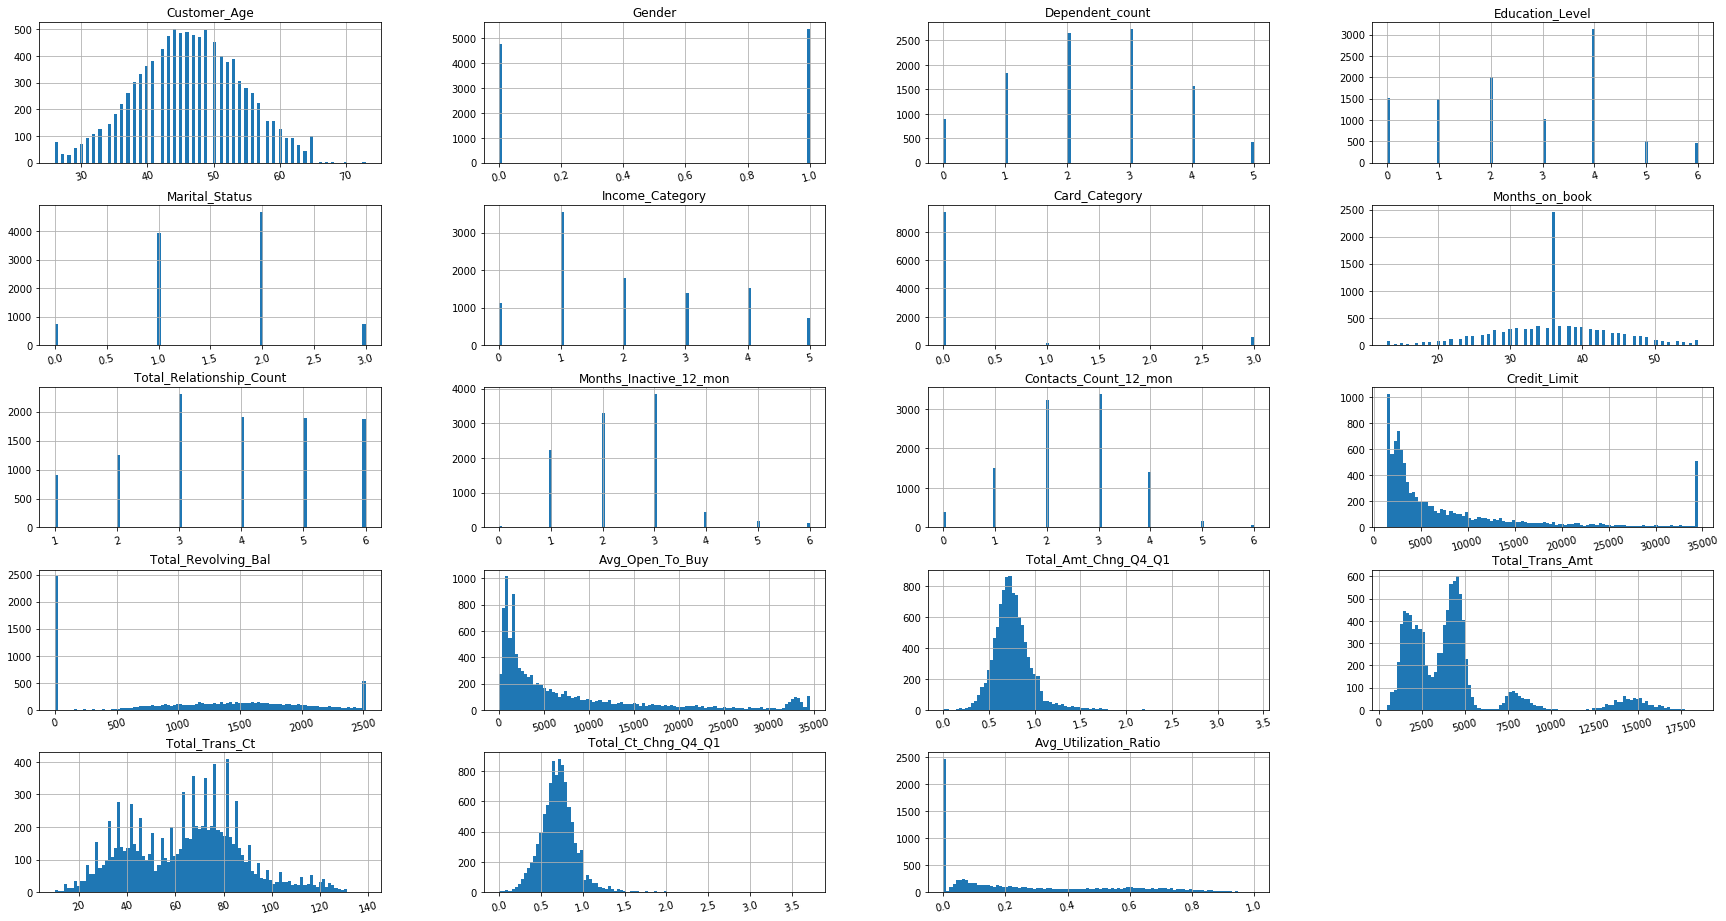

In [10]:
y = data[['Attrition_Flag']]
x = data.drop(columns=["Attrition_Flag"], axis = 1)

float_columns = [x for x in data.columns if x in data.select_dtypes('number')]
float_columns

#Plt histogram on numerical data
data.hist(figsize=(30,16), xrot=15, bins=int(data.shape[0]**0.5));

#Print Sknewness if skew value exceed 0.75
print("Numerical column skewness value > 0.75")
print("======================================")
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))
##print (skew_columns)
log_columns = skew_columns.loc[skew_columns > 0.75]
print (log_columns)

#after log tranform 
# Perform log transform on skewed columns
for col in log_columns.index.tolist():
    x[col] = np.log1p(x[col])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state = 0, stratify = y)

categorical_data = ['Gender','Education_Level','Marital_Status','Card_Category','Income_Category']

#x_train_categorical = x_train[categorical_data]
#x_test_categorical = x_test[categorical_data]
#x_train_numerical = x_train.drop(columns=categorical_data, axis = 1)
#x_test_numerical = x_test.drop(columns=categorical_data, axis = 1)

In [11]:
#label encoder label y 
def prepare_targets(y_train, y_test):
    labelencoder = LabelEncoder()
    labelencoder.fit(y_train)
    y_train_enc = labelencoder.transform(y_train)
    y_test_enc = labelencoder.transform(y_test)
    return y_train_enc, y_test_enc

y_train, y_test = prepare_targets(y_train,y_test)

C:\Users\HP ZBook\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP ZBook\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
def select_features(x_train_process, y_train, x_test_process):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(x_train[categorical_data], y_train)
    x_train_fs = fs.transform(x_train[categorical_data])
    x_test_fs = fs.transform(x_test[categorical_data])
    return x_train_fs, x_test_fs, fs


x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

Feature Gender: 2.520790
Feature Education_Level: 0.867891
Feature Marital_Status: 0.875907
Feature Card_Category: 0.165789
Feature Income_Category: 0.792270


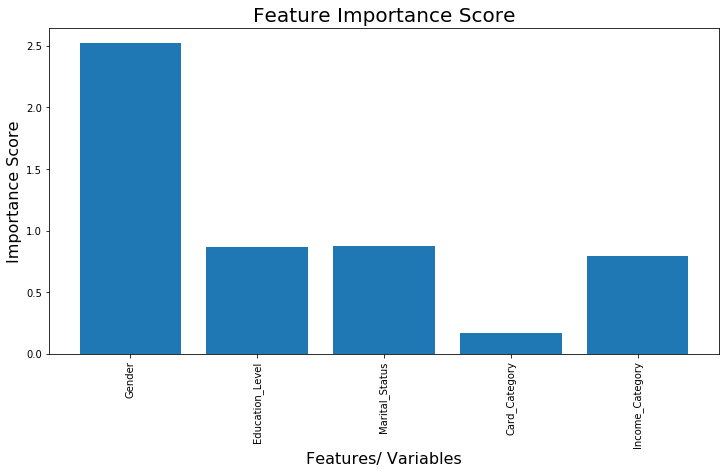

In [13]:
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (x[categorical_data].columns[i], fs.scores_[i]))
# plot the scores

plt.figure(figsize = (12,6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Feature Importance Score", size = 20)
plt.xlabel("Features/ Variables", size = 16, color = "black")
plt.ylabel("Importance Score", size = 16, color = "black")
plt.xticks(range(len(x[categorical_data].columns)), x[categorical_data].columns,rotation=90)
plt.show()


In [14]:
def prepare_inputs(x_train, x_test):
    mms = MinMaxScaler()
    x_train[num_cols] = mms.fit_transform(x_train[num_cols])
    x_test[num_cols] = mms.transform(x_test[num_cols])
    return x_train,x_test


    
#mix_maxscaler
x_train_process, x_test_process = prepare_inputs(x_train,x_test)


C:\Users\HP ZBook\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP ZBook\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\HP ZBook\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [15]:
# Visualising the accuracy score of each classification model

def plotEvaluationMetrics(models,y,title):
    plt.rcParams['figure.figsize']=15,8 
    sns.set_style("darkgrid")
    ax = sns.barplot(x=models, y=y, palette = "rocket", saturation =1.5)
    plt.xlabel("Classifier Models", fontsize = 20 )
    plt.ylabel("% of Accuracy", fontsize = 20)
    plt.title(title, fontsize = 20)
    plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
    plt.yticks(fontsize = 13)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        xPlot, yPlot = p.get_xy() 
        ax.annotate(f'{height:.3%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()

In [16]:
def plot_model_features(importance):
    plt.xticks(range(len(x.columns)), x.columns,rotation=90)
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

In [17]:
def model_training(classifier,x_train,x_test):
    start = time.time()
    model = classifier.fit(x_train, y_train)
    stop = time.time()
    trainingTime = stop - start
    print(f"Training time: {trainingTime}s")

    # Predicting the test set
    y_pred = classifier.predict(x_test)

    # Making the confusion matrix and calculating accuracy score
    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    acscore.append(ac)
    acprecision.append(precision)
    acrecall.append(recall)
    acF1.append(f1)
    acTrainingTime.append(trainingTime)

    sns.heatmap(cm, xticklabels=['Predicted Churn', 'Predicted Not Churn'], yticklabels=['Actual_Churn', 'Actual_Not_Churn'],
                annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    print('Accuracy score: {0:0.3f}'.format(ac))
    print('Precision score: {0:0.3f}'.format(precision))
    print('Recall score: {0:0.3f}'.format(recall))
    print('F1 score: {0:0.3f}'.format(f1))
    print('Training Accuracy: ',classifier.score(x_train, y_train))
    print('Testing Accuracy: ',classifier.score(x_test, y_test))
    target_names = ['churn', 'not churn']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    return model

In [18]:
def roc_curve(fpr,tpr,roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def model_roc_curve(classifier, x_train, x_test):
    clas = classifier
    clas.fit(x_train, y_train)
    predProb = clas.predict_proba(x_test)
    preds = predProb[:,1]
    fpr, tpr,threshold = metrics.roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    roc_curve(fpr,tpr,roc_auc)

# Feature Importance based on each model

In [19]:
def drop_least_importance(x_train, x_test, importance):
    features_score = []
    i=0
    for column in (x.columns):
        print('{:30s}'.format(column,importance[i]) , ":",'{0:0.5f}'.format(importance[i]))
        features_score.append((column, importance[i]))
        i+=1
    plot_model_features(importance)
    leastImportance = pd.DataFrame(features_score, columns=['features','score']).sort_values('score', ascending=True).head(11)

    # drop least importance columns
    for index, row in leastImportance.iterrows():
        x_train.drop(row['features'], axis=1, inplace=True)
        x_test.drop(row['features'], axis=1, inplace=True)

## Logistic Regression

Customer_Age                   : -0.04195
Gender                         : -0.54938
Dependent_count                : -0.39270
Education_Level                : 0.03457
Marital_Status                 : 0.15700
Income_Category                : -0.07559
Card_Category                  : -0.25780
Months_on_book                 : 0.13980
Total_Relationship_Count       : 2.10111
Months_Inactive_12_mon         : -2.68557
Contacts_Count_12_mon          : -2.56232
Credit_Limit                   : -0.56124
Total_Revolving_Bal            : 1.60298
Avg_Open_To_Buy                : 2.87618
Total_Amt_Chng_Q4_Q1           : 1.29980
Total_Trans_Amt                : -6.89770
Total_Trans_Ct                 : 13.16163
Total_Ct_Chng_Q4_Q1            : 6.03261
Avg_Utilization_Ratio          : 1.27225


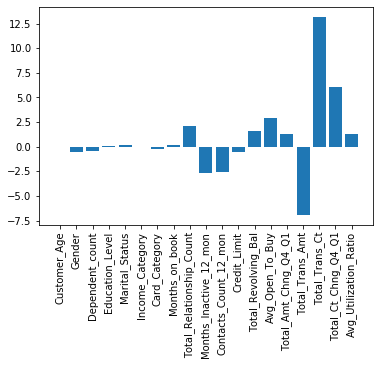

In [20]:
#lg
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(max_iter=10000)
LRclassifier.fit(x_train_process, y_train)
importance = LRclassifier.coef_[0]
x_lr_train = x_train_process.copy()
x_lr_test = x_test_process.copy()

drop_least_importance(x_lr_train, x_lr_test, importance)

## Gaussian Naive Bayes

Customer_Age                   : 0.00008
Gender                         : 0.00062
Dependent_count                : -0.00034
Education_Level                : -0.00051
Marital_Status                 : 0.00051
Income_Category                : 0.00017
Card_Category                  : 0.00023
Months_on_book                 : -0.00037
Total_Relationship_Count       : 0.01100
Months_Inactive_12_mon         : 0.00841
Contacts_Count_12_mon          : 0.00759
Credit_Limit                   : 0.00130
Total_Revolving_Bal            : 0.01820
Avg_Open_To_Buy                : -0.00119
Total_Amt_Chng_Q4_Q1           : -0.00051
Total_Trans_Amt                : -0.00765
Total_Trans_Ct                 : 0.02342
Total_Ct_Chng_Q4_Q1            : 0.01264
Avg_Utilization_Ratio          : 0.00237


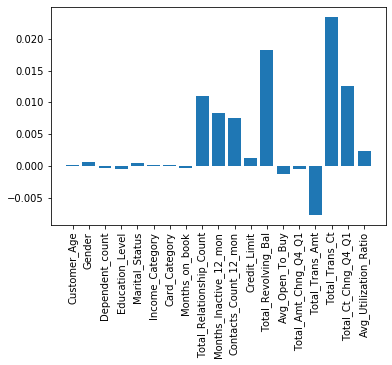

In [21]:
#gnb
GNBclassifier = GaussianNB()
GNBclassifier.fit(x_train_process, y_train)
results = permutation_importance(GNBclassifier,x_train_process,y_train, scoring='accuracy')
importance = results.importances_mean
x_gnb_train = x_train_process.copy()
x_gnb_test = x_test_process.copy()

drop_least_importance(x_gnb_train, x_gnb_test, importance)

## Support Vector Machine

Customer_Age                   : 0.00082
Gender                         : 0.00525
Dependent_count                : 0.00262
Education_Level                : 0.00375
Marital_Status                 : 0.00212
Income_Category                : 0.00316
Card_Category                  : 0.00014
Months_on_book                 : 0.00034
Total_Relationship_Count       : 0.01995
Months_Inactive_12_mon         : 0.00691
Contacts_Count_12_mon          : 0.00872
Credit_Limit                   : 0.00237
Total_Revolving_Bal            : 0.01868
Avg_Open_To_Buy                : 0.00045
Total_Amt_Chng_Q4_Q1           : 0.00124
Total_Trans_Amt                : 0.00085
Total_Trans_Ct                 : 0.06078
Total_Ct_Chng_Q4_Q1            : 0.01653
Avg_Utilization_Ratio          : 0.00827


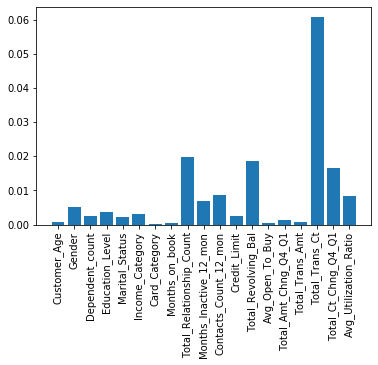

In [22]:
#svc
svc = SVC(probability=True)
svc.fit(x_train_process,y_train)
results = permutation_importance(svc,x_train_process,y_train, scoring='accuracy')
importance = results.importances_mean
x_svc_train = x_train_process.copy()
x_svc_test = x_test_process.copy()

drop_least_importance(x_svc_train, x_svc_test, importance)

## K Nearest Neighbour

Customer_Age                   : 0.00104
Gender                         : 0.01061
Dependent_count                : 0.00110
Education_Level                : 0.02788
Marital_Status                 : 0.02068
Income_Category                : 0.02607
Card_Category                  : 0.00245
Months_on_book                 : 0.00059
Total_Relationship_Count       : 0.01055
Months_Inactive_12_mon         : 0.00423
Contacts_Count_12_mon          : 0.00229
Credit_Limit                   : 0.00389
Total_Revolving_Bal            : 0.02429
Avg_Open_To_Buy                : -0.00028
Total_Amt_Chng_Q4_Q1           : 0.00045
Total_Trans_Amt                : 0.00564
Total_Trans_Ct                 : 0.01549
Total_Ct_Chng_Q4_Q1            : 0.00169
Avg_Utilization_Ratio          : 0.00753


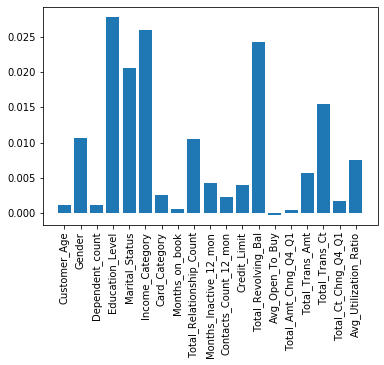

In [23]:
#knn
from sklearn.inspection import permutation_importance
KNN = KNeighborsClassifier()
KNN .fit(x_train_process,y_train)
results = permutation_importance(KNN,x_train_process,y_train, scoring='accuracy')
importance = results.importances_mean
x_knn_train = x_train_process.copy()
x_knn_test = x_test_process.copy()

drop_least_importance(x_knn_train, x_knn_test, importance)

## Decision Tree

Customer_Age                   : 0.02973
Gender                         : 0.00000
Dependent_count                : 0.00469
Education_Level                : 0.01164
Marital_Status                 : 0.00642
Income_Category                : 0.00325
Card_Category                  : 0.00000
Months_on_book                 : 0.01671
Total_Relationship_Count       : 0.08723
Months_Inactive_12_mon         : 0.01708
Contacts_Count_12_mon          : 0.01732
Credit_Limit                   : 0.01647
Total_Revolving_Bal            : 0.19016
Avg_Open_To_Buy                : 0.02397
Total_Amt_Chng_Q4_Q1           : 0.05224
Total_Trans_Amt                : 0.14290
Total_Trans_Ct                 : 0.28958
Total_Ct_Chng_Q4_Q1            : 0.08910
Avg_Utilization_Ratio          : 0.00150


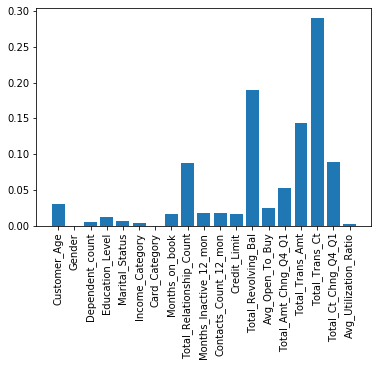

In [24]:
#dtt
DTC = DecisionTreeClassifier()
DTC.fit(x_train_process,y_train)
importance = DTC.feature_importances_
x_dtt_train = x_train_process.copy()
x_dtt_test = x_test_process.copy()

drop_least_importance(x_dtt_train, x_dtt_test, importance)

## Random Forest

Customer_Age                   : 0.03248
Gender                         : 0.00677
Dependent_count                : 0.01309
Education_Level                : 0.01267
Marital_Status                 : 0.00957
Income_Category                : 0.01124
Card_Category                  : 0.00220
Months_on_book                 : 0.02416
Total_Relationship_Count       : 0.06757
Months_Inactive_12_mon         : 0.02567
Contacts_Count_12_mon          : 0.02661
Credit_Limit                   : 0.03350
Total_Revolving_Bal            : 0.11713
Avg_Open_To_Buy                : 0.03125
Total_Amt_Chng_Q4_Q1           : 0.06801
Total_Trans_Amt                : 0.19459
Total_Trans_Ct                 : 0.16327
Total_Ct_Chng_Q4_Q1            : 0.10291
Avg_Utilization_Ratio          : 0.05730


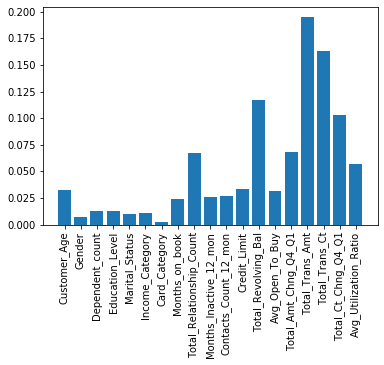

In [25]:
#RFC
RFC = RandomForestClassifier()
RFC.fit(x_train_process,y_train)
importance = RFC.feature_importances_
x_rfc_train = x_train_process.copy()
x_rfc_test = x_test_process.copy()

drop_least_importance(x_rfc_train, x_rfc_test, importance)

## Stochastic Gradient Descent

Customer_Age                   : 0.08725
Gender                         : -0.65734
Dependent_count                : -0.30910
Education_Level                : -0.15977
Marital_Status                 : 0.18244
Income_Category                : 0.06177
Card_Category                  : -0.27497
Months_on_book                 : -0.00222
Total_Relationship_Count       : 2.34574
Months_Inactive_12_mon         : -3.09227
Contacts_Count_12_mon          : -2.92049
Credit_Limit                   : -0.99257
Total_Revolving_Bal            : 1.71244
Avg_Open_To_Buy                : 4.83468
Total_Amt_Chng_Q4_Q1           : 1.61993
Total_Trans_Amt                : -9.08208
Total_Trans_Ct                 : 15.99300
Total_Ct_Chng_Q4_Q1            : 6.91053
Avg_Utilization_Ratio          : 1.75800


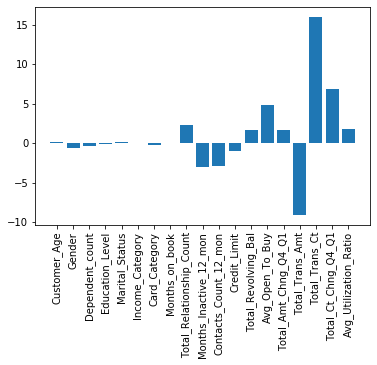

In [26]:
#sgd
SGDC = SGDClassifier(shuffle=False,loss="log")
SGDC.fit(x_train_process,y_train)
importance = SGDC.coef_[0]
x_sgd_train = x_train_process.copy()
x_sgd_test = x_test_process.copy()

drop_least_importance(x_sgd_train, x_sgd_test, importance)

## XGBoost

C:\Users\HP ZBook\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Customer_Age                   : 0.04051
Gender                         : 0.01669
Dependent_count                : 0.01485
Education_Level                : 0.01092
Marital_Status                 : 0.01326
Income_Category                : 0.00855
Card_Category                  : 0.00000
Months_on_book                 : 0.01406
Total_Relationship_Count       : 0.14813
Months_Inactive_12_mon         : 0.05170
Contacts_Count_12_mon          : 0.02828
Credit_Limit                   : 0.02452
Total_Revolving_Bal            : 0.18429
Avg_Open_To_Buy                : 0.02882
Total_Amt_Chng_Q4_Q1           : 0.03417
Total_Trans_Amt                : 0.06410
Total_Trans_Ct                 : 0

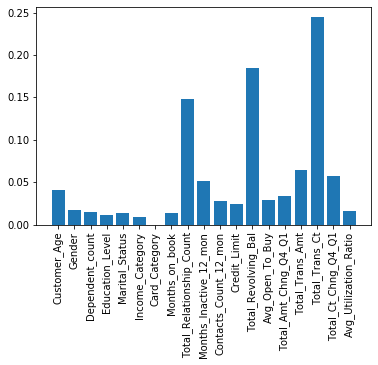

In [27]:
#xgboost
m_xgb = xgb.XGBClassifier()
m_xgb.fit(x_train_process,y_train)
importance =  m_xgb.feature_importances_
x_xgb_train = x_train_process.copy()
x_xgb_test = x_test_process.copy()

drop_least_importance(x_xgb_train, x_xgb_test, importance)

# Dirty Model (Using Important Variables of each model)

In [28]:
acscore = []
acprecision = []
acrecall = []
acF1 = []
acTrainingTime = []

## Logistic Regression

Training time: 0.05186057090759277s
Accuracy score: 0.897
Precision score: 0.908
Recall score: 0.976
F1 score: 0.941
Training Accuracy:  0.8927765237020316
Testing Accuracy:  0.8970055939453768
              precision    recall  f1-score   support

       churn       0.80      0.48      0.60       488
   not churn       0.91      0.98      0.94      2551

    accuracy                           0.90      3039
   macro avg       0.85      0.73      0.77      3039
weighted avg       0.89      0.90      0.89      3039



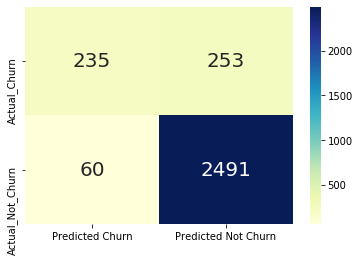

In [29]:
LRclassifier = LogisticRegression(max_iter=10000)
modelLR = model_training(LRclassifier,x_lr_train,x_lr_test)

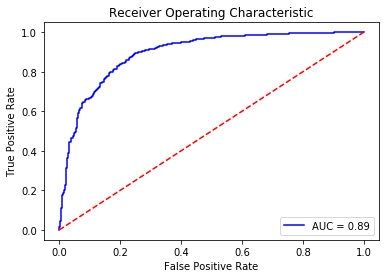

In [30]:
model_roc_curve(LogisticRegression(max_iter=10000), x_lr_train, x_lr_test)

## Gaussian Naive Bayes

Training time: 0.003989696502685547s
Accuracy score: 0.899
Precision score: 0.925
Recall score: 0.957
F1 score: 0.941
Training Accuracy:  0.8971501128668171
Testing Accuracy:  0.8986508719973676
              precision    recall  f1-score   support

       churn       0.72      0.59      0.65       488
   not churn       0.92      0.96      0.94      2551

    accuracy                           0.90      3039
   macro avg       0.82      0.78      0.80      3039
weighted avg       0.89      0.90      0.89      3039



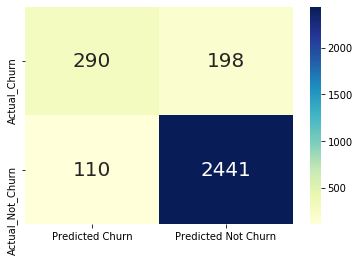

In [31]:
GNBclassifier = GaussianNB()
modelGNB = model_training(GNBclassifier,x_gnb_train,x_gnb_test)

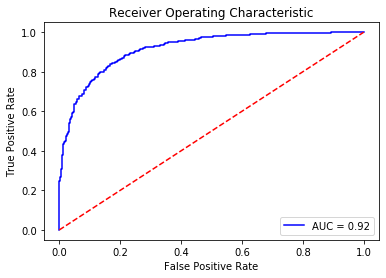

In [32]:
model_roc_curve(GNBclassifier,x_gnb_train,x_gnb_test)

## Support Vector Machine

Training time: 2.5388410091400146s
Accuracy score: 0.915
Precision score: 0.922
Recall score: 0.982
F1 score: 0.951
Training Accuracy:  0.919441309255079
Testing Accuracy:  0.9147745969068772
              precision    recall  f1-score   support

       churn       0.85      0.57      0.68       488
   not churn       0.92      0.98      0.95      2551

    accuracy                           0.91      3039
   macro avg       0.89      0.77      0.82      3039
weighted avg       0.91      0.91      0.91      3039



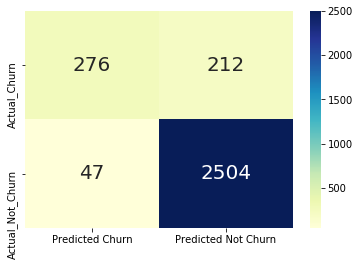

In [33]:
svc = SVC(probability=True)
modelSVC = model_training(svc,x_svc_train,x_svc_test)

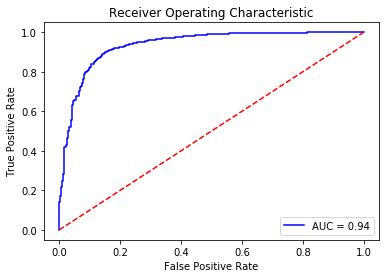

In [34]:
model_roc_curve(svc,x_svc_train,x_svc_test)

## K Nearest Neighbour

Training time: 0.02892303466796875s
Accuracy score: 0.869
Precision score: 0.883
Recall score: 0.972
F1 score: 0.926
Training Accuracy:  0.8939051918735892
Testing Accuracy:  0.8687068114511353
              precision    recall  f1-score   support

       churn       0.69      0.33      0.45       488
   not churn       0.88      0.97      0.93      2551

    accuracy                           0.87      3039
   macro avg       0.79      0.65      0.69      3039
weighted avg       0.85      0.87      0.85      3039



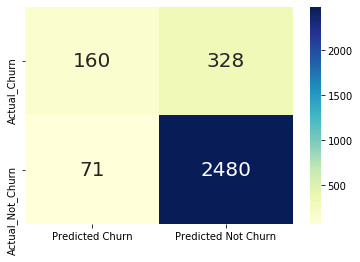

In [35]:
KNN = KNeighborsClassifier()
modelKNN = model_training(KNN,x_knn_train,x_knn_test)

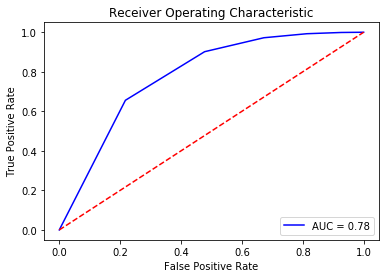

In [36]:
model_roc_curve(KNN,x_knn_train,x_knn_test)

## Decision Tree

Training time: 0.038895368576049805s
Accuracy score: 0.938
Precision score: 0.963
Recall score: 0.964
F1 score: 0.963
Training Accuracy:  1.0
Testing Accuracy:  0.9381375452451465
              precision    recall  f1-score   support

       churn       0.81      0.81      0.81       488
   not churn       0.96      0.96      0.96      2551

    accuracy                           0.94      3039
   macro avg       0.89      0.88      0.89      3039
weighted avg       0.94      0.94      0.94      3039



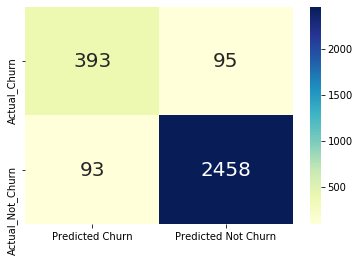

In [37]:
DTC = DecisionTreeClassifier()
modelDTC = model_training(DTC,x_dtt_train,x_dtt_test)

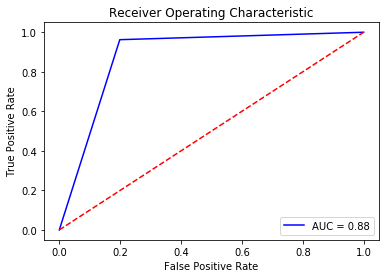

In [38]:
model_roc_curve(DTC,x_dtt_train,x_dtt_test)

## Random Forest

Training time: 1.0834131240844727s
Accuracy score: 0.959
Precision score: 0.970
Recall score: 0.981
F1 score: 0.975
Training Accuracy:  1.0
Testing Accuracy:  0.9585389930898321
              precision    recall  f1-score   support

       churn       0.89      0.84      0.87       488
   not churn       0.97      0.98      0.98      2551

    accuracy                           0.96      3039
   macro avg       0.93      0.91      0.92      3039
weighted avg       0.96      0.96      0.96      3039



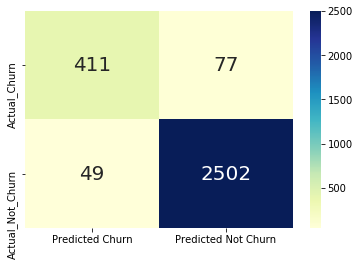

In [39]:
RFC = RandomForestClassifier()
modelRFC = model_training(RFC,x_rfc_train,x_rfc_test)

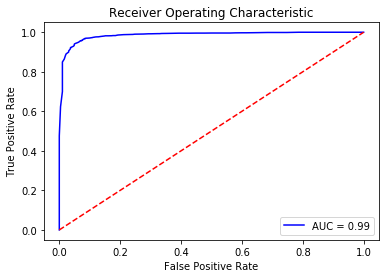

In [40]:
model_roc_curve(RFC,x_rfc_train,x_rfc_test)

## Stochastic Gradient Descent

Training time: 0.020955562591552734s
Accuracy score: 0.894
Precision score: 0.904
Recall score: 0.977
F1 score: 0.939
Training Accuracy:  0.8933408577878104
Testing Accuracy:  0.8940440934517934
              precision    recall  f1-score   support

       churn       0.79      0.46      0.58       488
   not churn       0.90      0.98      0.94      2551

    accuracy                           0.89      3039
   macro avg       0.85      0.72      0.76      3039
weighted avg       0.89      0.89      0.88      3039



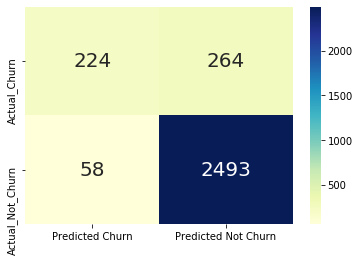

In [41]:
SGDC = SGDClassifier(shuffle=False,loss="log")
modelSGD = model_training(SGDC,x_sgd_train,x_sgd_test)

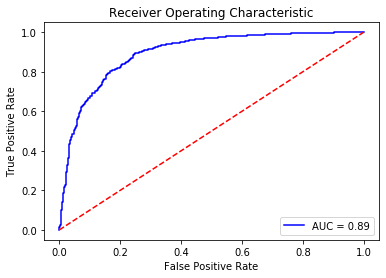

In [42]:
model_roc_curve(SGDC,x_sgd_train,x_sgd_test)

## XGBoost

C:\Users\HP ZBook\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training time: 0.5206060409545898s
Accuracy score: 0.970
Precision score: 0.977
Recall score: 0.988
F1 score: 0.982
Training Accuracy:  1.0
Testing Accuracy:  0.9703849950641659
              precision    recall  f1-score   support

       churn       0.93      0.88      0.91       488
   not churn       0.98      0.99      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.93      0.94      3039
weighted avg       0.97      0.97      0.97      3039



C:\Users\HP ZBook\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


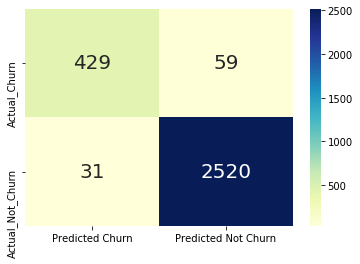

In [43]:
m_xgb = xgb.XGBClassifier()
modelXGB = model_training(m_xgb,x_xgb_train,x_xgb_test)

[18:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


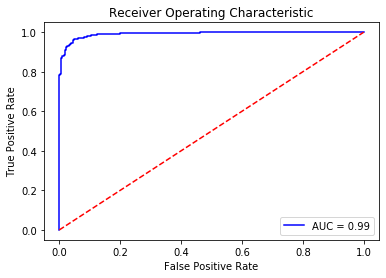

In [44]:
model_roc_curve(m_xgb,x_xgb_train,x_xgb_test)

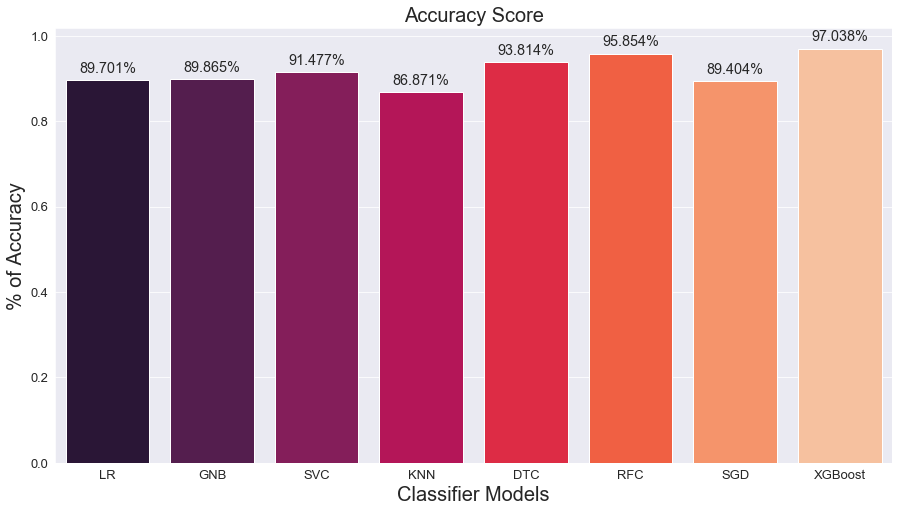

In [45]:
# every model accuracy graph
models = ['LR','GNB','SVC','KNN', 'DTC', 'RFC', 'SGD','XGBoost']
# Visualising the accuracy score of each classification model
plotEvaluationMetrics(models,acscore,"Accuracy Score")

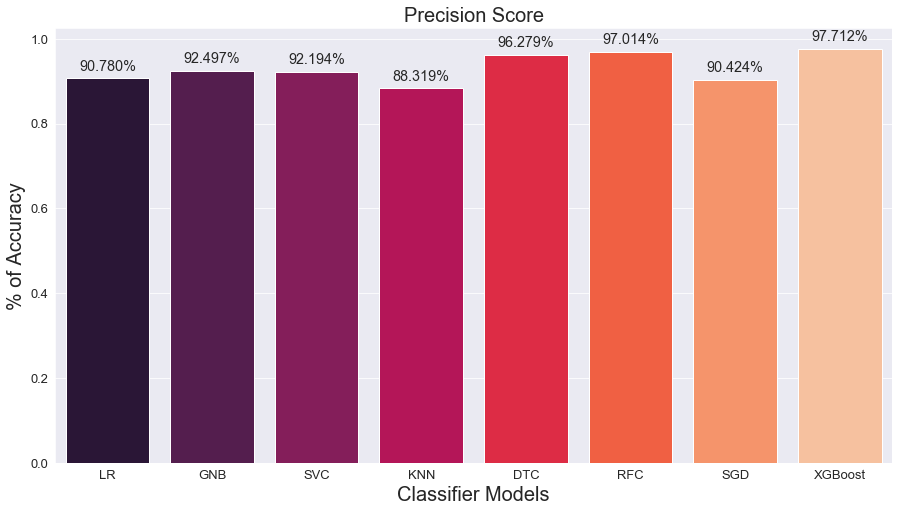

In [46]:
plotEvaluationMetrics(models,acprecision,"Precision Score")

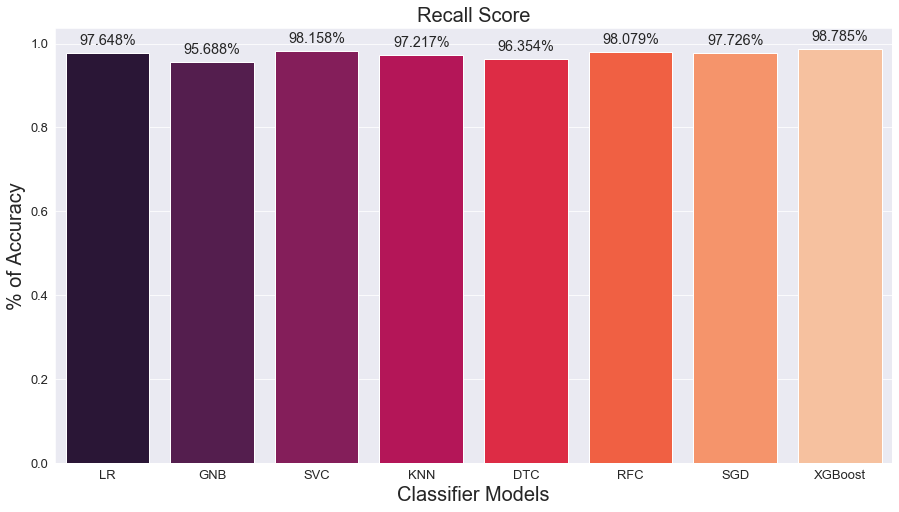

In [47]:
plotEvaluationMetrics(models,acrecall,"Recall Score")

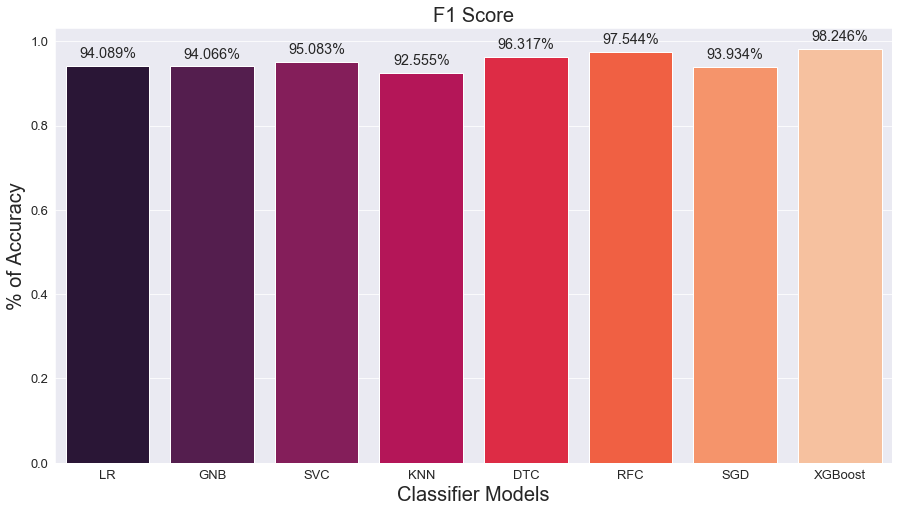

In [48]:
plotEvaluationMetrics(models,acF1,"F1 Score")

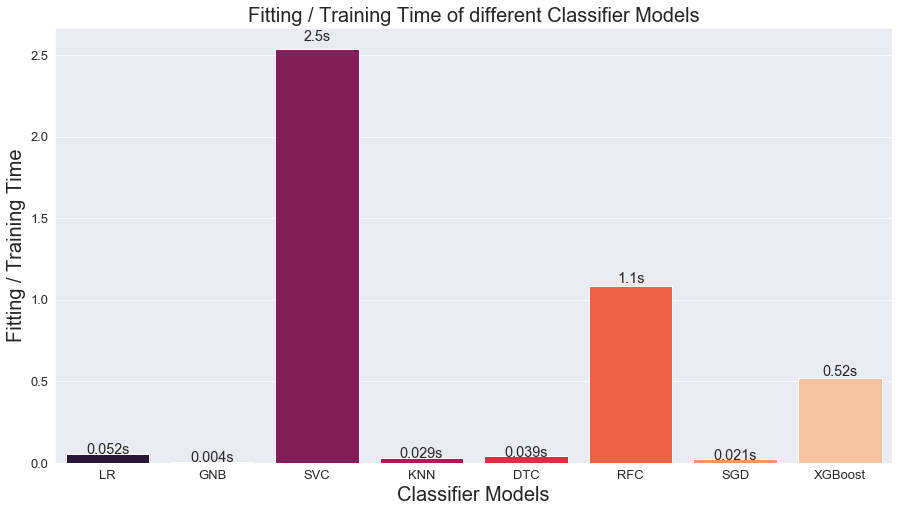

In [49]:
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=acTrainingTime, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("Fitting / Training Time", fontsize = 20)
plt.title("Fitting / Training Time of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.2}''s', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [50]:
x_lr_concat = pd.concat([x_lr_train,x_lr_test])
x_gnb_concat = pd.concat([x_gnb_train,x_gnb_test])
x_svc_concat = pd.concat([x_svc_train,x_svc_test])
x_knn_concat = pd.concat([x_knn_train,x_knn_test])
x_dtt_concat = pd.concat([x_dtt_train,x_dtt_test])
x_rfc_concat = pd.concat([x_rfc_train,x_rfc_test])
x_sgd_concat = pd.concat([x_sgd_train,x_sgd_test])
x_xgb_concat = pd.concat([x_xgb_train,x_xgb_test])

y_concat = np.concatenate((y_train, y_test), axis=None)

# Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
CVMean = []
CVSD = []

LGTuple = []
LGTuple = cross_val_score(LogisticRegression(random_state=0,max_iter=10000),x_lr_concat, y_concat,cv=5,scoring='accuracy')
print(LGTuple)
print("LG CV mean : ",LGTuple.mean())
CVMean.append(LGTuple.mean())
CVSD.append(LGTuple.std())

GNBTuple = []
GNBTuple = cross_val_score(GaussianNB(),x_gnb_concat, y_concat,cv=5,scoring='accuracy')
print(GNBTuple)
print("GNB CV mean : ",GNBTuple.mean())
CVMean.append(GNBTuple.mean())
CVSD.append(GNBTuple.std())

SVCTuple = []
SVCTuple = cross_val_score(SVC(probability=True),x_svc_concat, y_concat,cv=5,scoring='accuracy')
print(SVCTuple)
print("SVC CV mean : ",SVCTuple.mean())
CVMean.append(SVCTuple.mean())
CVSD.append(SVCTuple.std())


KNNTuple = []
KNNTuple = cross_val_score(KNeighborsClassifier(),x_knn_concat, y_concat,cv=5,scoring='accuracy')
print(KNNTuple)
print("KNN CV mean : ",KNNTuple.mean())
CVMean.append(KNNTuple.mean())
CVSD.append(KNNTuple.std())


DTTuple = []
DTTuple = cross_val_score(DecisionTreeClassifier(),x_dtt_concat, y_concat,cv=5,scoring='accuracy')
print(DTTuple)
print("DT CV mean : ",DTTuple.mean())
CVMean.append(DTTuple.mean())
CVSD.append(DTTuple.std())

RFTuple = []
RFTuple = cross_val_score(RandomForestClassifier(),x_rfc_concat, y_concat,cv=5,scoring='accuracy')
print(RFTuple)
print("RF CV mean : ",RFTuple.mean())
CVMean.append(RFTuple.mean())
CVSD.append(RFTuple.std())

SGDTuple = []
SGDTuple = cross_val_score(SGDClassifier(loss="log"),x_sgd_concat, y_concat,cv=5,scoring='accuracy')
print(SGDTuple)
print("SGD CV mean : ",SGDTuple.mean())
CVMean.append(SGDTuple.mean())
CVSD.append(SGDTuple.std())

XGBTuple = []
XGBTuple = cross_val_score(xgb.XGBClassifier(),x_xgb_concat, y_concat,cv=5,scoring='accuracy')
print(XGBTuple)
print("XGB CV mean : ",XGBTuple.mean())
CVMean.append(XGBTuple.mean())
CVSD.append(XGBTuple.std())

[0.89042448 0.89338598 0.88987654 0.89580247 0.89925926]
LG CV mean :  0.8937497471146699
[0.89239882 0.89733465 0.89777778 0.89037037 0.9037037 ]
GNB CV mean :  0.8963170633614859
[0.9136229  0.91461007 0.91604938 0.91802469 0.91703704]
SVC CV mean :  0.9158688164966545
[0.86673248 0.86673248 0.8691358  0.86666667 0.87802469]
KNN CV mean :  0.869458423214264
[0.94027641 0.93879566 0.9382716  0.94024691 0.94419753]
DT CV mean :  0.9403576225122787
[0.95903258 0.96001974 0.96049383 0.96049383 0.96444444]
RF CV mean :  0.9608968837214971
[0.87709773 0.89239882 0.89382716 0.88888889 0.89283951]
SGD CV mean :  0.8890104200943293
[18:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP ZBook\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\HP ZBook\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[18:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

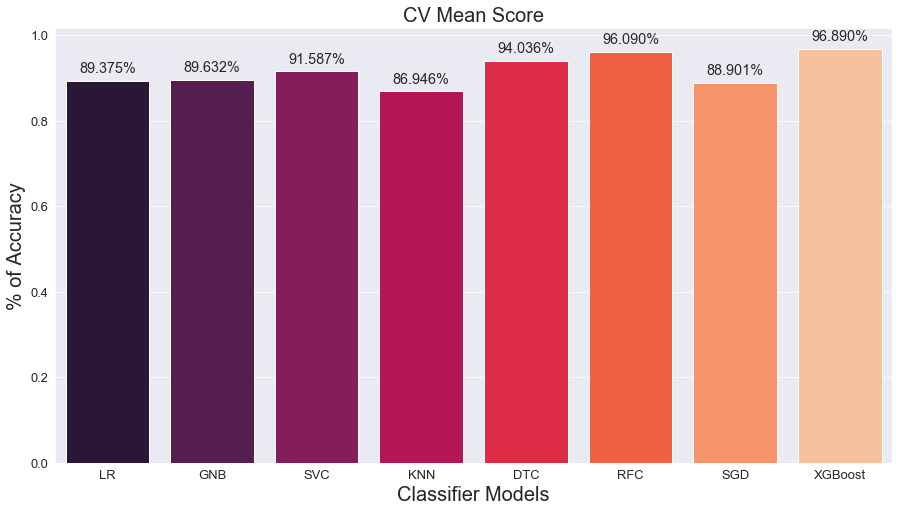

In [52]:
plotEvaluationMetrics(models,CVMean,"CV Mean Score")

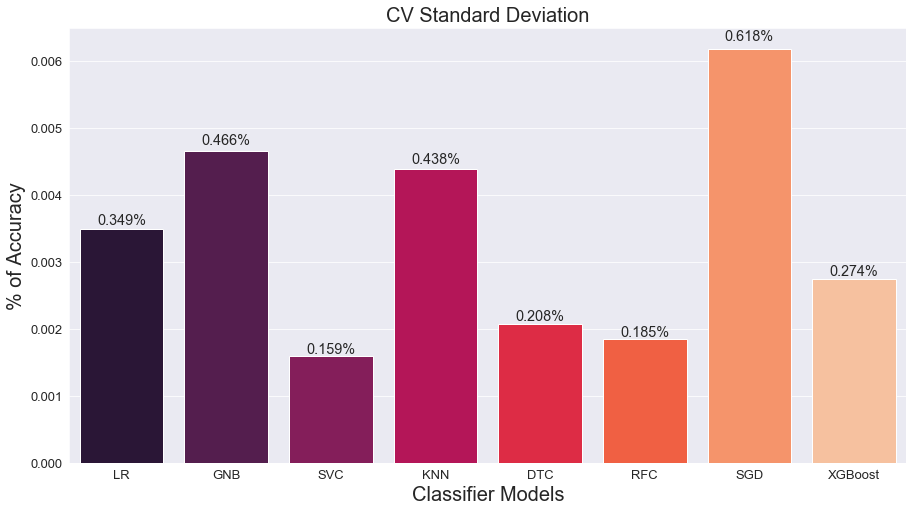

In [53]:
plotEvaluationMetrics(models,CVSD,"CV Standard Deviation")

# Save and load the saved model

In [54]:
from sklearn.externals import joblib

def save_model(model, fileName):
    # Save Model to file in the current working directory
    joblib.dump(model, fileName)
    
def load_model(fileName,x_test,ytest):    
    # Load from file
    joblib_model = joblib.load(fileName)
    print(joblib_model,' ','\n')
    
    y_pred = joblib_model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    sns.heatmap(cm, xticklabels=['Predicted Churn', 'Predicted Not Churn'], yticklabels=['Actual_Churn', 'Actual_Not_Churn'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    print('Accuracy score: {0:0.3f}'.format(ac))
    print('Precision score: {0:0.3f}'.format(precision))
    print('Recall score: {0:0.3f}'.format(recall))
    print('F1 score: {0:0.3f}'.format(f1))
    print('Testing Accuracy: ',joblib_model.score(x_test, y_test))
    target_names = ['churn', 'not churn']
    print(classification_report(y_test, y_pred, target_names=target_names))

C:\Users\HP ZBook\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [55]:
fileName ="joblib_Model.pkl"
save_model(modelXGB,fileName)

C:\Users\HP ZBook\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)   

Accuracy score: 0.970
Precision score: 0.977
Recall score: 0.988
F1 score: 0.982
Testing Accuracy:  0.9703849950641659
              precision    recall  f1-score   support

       churn       0.93      0.88      0.91       488
   not churn       0.98      0.99      0.98      2551

    accuracy                           0.97      3

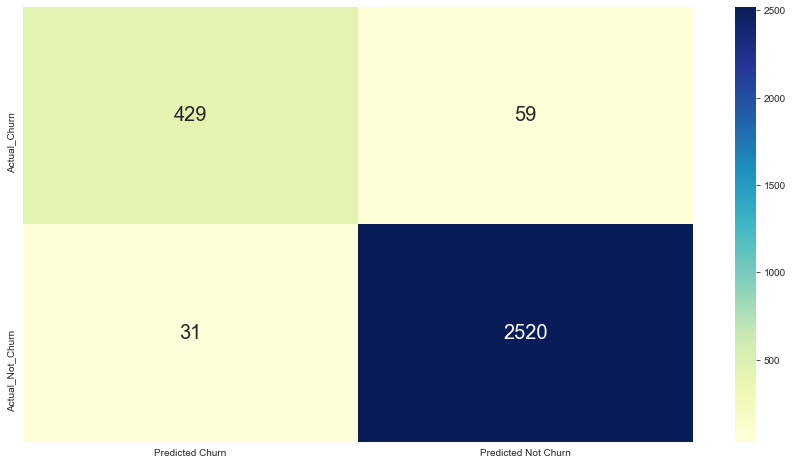

In [56]:
load_model(fileName,x_xgb_test,y_test)